In [1]:
import os
import zipfile
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers 
from keras.layers import Conv3D, MaxPool3D, Flatten, Dense

model_name = "PE_classification_224_160_48_1_3_d_good1.h5"

# Folder "nr_128_64" consist of CT scans having normal lung tissue or other lung disease

normal_scan_paths2 = [
    os.path.join(os.getcwd(), "C:/Users/85298/AI/PE0415/val/nr", x)
    for x in os.listdir("C:/Users/85298/AI/PE0415/val/nr")
]
# Folder "pe_128_64" consist of CT scans having Pulmonary embolism,

abnormal_scan_paths2 = [
    os.path.join(os.getcwd(),"C:/Users/85298/AI/PE0415/val/pe", x)
    for x in os.listdir("C:/Users/85298/AI/PE0415/val/pe")
]

print("CT scans with normal lung tissue: " + str(len(normal_scan_paths2)))
print("CT scans with abnormal lung tissue: " + str(len(abnormal_scan_paths2)))


####################################################

import nibabel as nib

from scipy import ndimage


def read_nifti_file(filepath):
#   Read and load volume
    # Read file
    scan = nib.load(filepath)
    # Get raw data
    scan = scan.get_fdata()
    return scan


abnormal_scans2 = np.array([read_nifti_file(path) for path in abnormal_scan_paths2])
normal_scans2 = np.array([read_nifti_file(path) for path in normal_scan_paths2])

nr100 = round(len(normal_scan_paths2)  )
pe100 = round(len(abnormal_scan_paths2)   )


#print("nr70%:",nr70,"nr30%",nr30)
#print("pe70%:",pe70,"pe30%:",pe30)

# For the CT scans having Pulmonary embolism
# assign 1, for the normal and other disease ones assign 0.
abnormal_labels2 = np.array([1 for _ in range(len(abnormal_scans2))])
normal_labels2 = np.array([0 for _ in range(len(normal_scans2))])

# Split data in the ratio 70-30 for training and validation.
x_train2 = np.concatenate((abnormal_scans2[:pe100], normal_scans2[:nr100]), axis=0)
y_train2 = np.concatenate((abnormal_labels2[:pe100], normal_labels2[:nr100]), axis=0)
x_val2 = np.concatenate((abnormal_scans2[pe100:], normal_scans2[nr100:]), axis=0)
y_val2 = np.concatenate((abnormal_labels2[pe100:], normal_labels2[nr100:]), axis=0)
print(
    "Number of samples in train and validation are %d and %d."
    % (x_train2.shape[0], x_val2.shape[0])
)


CT scans with normal lung tissue: 26
CT scans with abnormal lung tissue: 14
Number of samples in train and validation are 40 and 0.


In [3]:
from keras.utils import np_utils
from keras.layers import Conv3D, MaxPool3D, Flatten, Dense
from keras.layers import Dropout, Input, BatchNormalization
from sklearn.metrics import confusion_matrix, accuracy_score
from keras.losses import binary_crossentropy
from keras.optimizers import Adadelta, SGD
from matplotlib.pyplot import cm
import matplotlib.pyplot as plt
from keras.models import Model
import cv2
import time
import os
import numpy as np
import keras
import h5py
import numpy as np
from keras import regularizers
import os
import glob
import cv2
import random
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_curve, roc_auc_score
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint, CSVLogger, EarlyStopping, ReduceLROnPlateau
from keras.models import Sequential
from keras.optimizers import RMSprop
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from keras import optimizers
from keras.utils import to_categorical, plot_model
from keras.layers import Dense, Input, Conv2D, Flatten, MaxPooling2D, Activation
from keras.models import Model, Sequential
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.callbacks import ModelCheckpoint
from keras.optimizers import Adam
from keras.applications.vgg16 import VGG16
from keras.models import load_model
from keras.utils import np_utils
from keras import backend as K
from keras.models import load_model
import keras
import tensorflow as tf

def get_model():
    
    input_layer = Input((224, 160, 48, 1))
    
    conv_layer1 = Conv3D(filters=128, kernel_size=(3, 3, 3), activation='relu')(input_layer)
    pooling_layer1 = MaxPool3D(pool_size=(2, 2, 2))(conv_layer1)
    pooling_layer1 = BatchNormalization()(pooling_layer1) 
#    pooling_layer1 = Dropout(0.5)(pooling_layer1)  
    
    
    conv_layer2 = Conv3D(filters=256, kernel_size=(3, 3, 3), activation='relu')(pooling_layer1)
    pooling_layer2 = MaxPool3D(pool_size=(2, 2, 2))(conv_layer2)
    pooling_layer2 = BatchNormalization()(pooling_layer2)  
#    pooling_layer2 = Dropout(0.5)(pooling_layer2)
    
    conv_layer3 = Conv3D(filters=512, kernel_size=(3, 3, 3), activation='relu')(pooling_layer2)
    pooling_layer3 = MaxPool3D(pool_size=(2, 2, 2))(conv_layer3)
    pooling_layer3 = BatchNormalization()(pooling_layer3)
#    pooling_layer3 = Dropout(0.5)(pooling_layer3)
    
    conv_layer4 = Conv3D(filters=1024, kernel_size=(3, 3, 3), activation='relu')(pooling_layer3)
    pooling_layer4 = MaxPool3D(pool_size=(2, 2, 2))(conv_layer4)
    pooling_layer4 = BatchNormalization()(pooling_layer4)
#    pooling_layer4 = Dropout(0.5)(pooling_layer4)
    
    flatten_layer = Flatten()(pooling_layer4)
    

    dense_layer4 = Dense(units=2048, activation='relu')( flatten_layer)
    dense_layer4 = Dropout(0.4)(dense_layer4)
    
    
    dense_layer5 = Dense(units=1024, activation='relu')(dense_layer4)
    dense_layer5 = Dropout(0.4)(dense_layer5)
    
    output_layer = Dense(units=1, activation="sigmoid")(dense_layer5)
    

    model = Model(inputs=input_layer, outputs=output_layer, name="3dcnn")

    
    return model

model = None
model = get_model()
model.summary()

Model: "3dcnn"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 160, 48, 1)  0         
                             ]                                   
                                                                 
 conv3d (Conv3D)             (None, 222, 158, 46, 128  3584      
                             )                                   
                                                                 
 max_pooling3d (MaxPooling3D  (None, 111, 79, 23, 128)  0        
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 111, 79, 23, 128)  512      
 ormalization)                                                   
                                                                 
 conv3d_1 (Conv3D)           (None, 109, 77, 21, 256)  884992

In [3]:
import warnings 
warnings.simplefilter(action='ignore',category=FutureWarning)

In [4]:
import numpy as np
import pandas as pd
import csv
from keras.models import load_model

df_label = pd.read_csv('C:/Users/85298/AI/CT_image/202304/label_cut_d.csv' , sep=',')
y=df_label.set_index("ID3", inplace = True)


df_out = pd.DataFrame(columns = ["ID","Disease","Label","predict", "actual"])
df_out2 = pd.DataFrame(columns = ["predict", "actual"])

len_nr = len(normal_scan_paths2)
len_pe = len(abnormal_scan_paths2)


for patient in range (0,len(y_train2)):

#for patient in range (0,20):
    
    if patient < len_pe:
    
        file_path = abnormal_scan_paths2[patient]
    
    else :
        
        file_path = normal_scan_paths2 [patient-len_pe]
        
    ID = file_path.split("_") [2]


    
    Disease = df_label.loc[int(ID)]["Disease"]    

    Label = df_label.loc[int(ID)]["Label"] 
    

    

# Load best weights.


    model.load_weights(model_name)
    prediction = model.predict(np.expand_dims(x_train2[patient], axis=0))[0]
    label_1 = y_train2[patient]
    
    scores = [1 - prediction[0], prediction[0]]
 #   print(label_1)
     
    prediction_score = round(prediction[0] *100,2)
    prediction_score2 = prediction[0] *100
        
    df_out = df_out.append({"ID": ID,"Disease":Disease,"Label":Label ,'predict' : prediction_score , 'actual' : label_1 },
        ignore_index = True)

    df_out2 = df_out2.append({'predict' : prediction_score2 , 'actual' : label_1 },
        ignore_index = True)
    
    
print(df_out)    


    
    

                
    
        




1/1 [==============================] - 0s 14ms/step
      ID                                Disease  Label  predict actual
0   3002                             Chronic PE     PE    15.81      1
1   3022                             Chronic PE     PE    59.00      1
2   3024                             Chronic PE     PE    25.37      1
3   4005             Pulmonary embolism present     PE    46.46      1
4   4037             Pulmonary embolism present     PE    44.17      1
5   4039   Non-diagnostic of pulmonary embolism     PE    11.57      1
6   5009             Pulmonary embolism present     PE    66.42      1
7   5010             Pulmonary embolism present     PE    50.36      1
8   5011             Pulmonary embolism present     PE    57.52      1
9   5018  Non diagnostic for pulmonary embolism     PE    47.82      1
10  5020             Pulmonary embolism present     PE    48.57      1
11  6018                                Present     PE    11.48      1
12  6020                 

In [5]:
import numpy as np
import pandas as pd
import csv
from keras.models import load_model

for i in np.arange (1,99,1):
    
    i = round(i,2)

    TP = 0
    FP = 0
    TN = 0
    FN = 0


    for patient in range (0,len(df_out)):
    

        if (df_out["predict"].iloc[patient] > i) & (df_out["actual"].iloc[patient] == 1) :
            TP = TP + 1
        if (df_out["predict"].iloc[patient] > i) & (df_out["actual"].iloc[patient] == 0) :
            FP = FP + 1
        if (df_out["predict"].iloc[patient] < i) & (df_out["actual"].iloc[patient] == 0) :
            TN = TN + 1
        if (df_out["predict"].iloc[patient] < i) & (df_out["actual"].iloc[patient] == 1) :
            FN = FN + 1        
        

    Precision = TP/(TP+FP)

    Recall = TP/(TP+FN)

    F1_score = ((Precision*Recall)/(Precision+Recall))*2

    Accuracy = (TP+TN)/(TP+FP+TN+FN)
    print(str(i))
    print ("Precision",Precision,"Recall",Recall,"F1_score",F1_score,"Accuracy",Accuracy)
    print (TP,FP,TN,FN)           



1
Precision 0.35 Recall 1.0 F1_score 0.5185185185185185 Accuracy 0.35
14 26 0 0
2
Precision 0.3684210526315789 Recall 1.0 F1_score 0.5384615384615384 Accuracy 0.4
14 24 2 0
3
Precision 0.3684210526315789 Recall 1.0 F1_score 0.5384615384615384 Accuracy 0.4
14 24 2 0
4
Precision 0.3684210526315789 Recall 1.0 F1_score 0.5384615384615384 Accuracy 0.4
14 24 2 0
5
Precision 0.3684210526315789 Recall 1.0 F1_score 0.5384615384615384 Accuracy 0.4
14 24 2 0
6
Precision 0.3684210526315789 Recall 1.0 F1_score 0.5384615384615384 Accuracy 0.4
14 24 2 0
7
Precision 0.3684210526315789 Recall 1.0 F1_score 0.5384615384615384 Accuracy 0.4
14 24 2 0
8
Precision 0.3684210526315789 Recall 1.0 F1_score 0.5384615384615384 Accuracy 0.4
14 24 2 0
9
Precision 0.3684210526315789 Recall 1.0 F1_score 0.5384615384615384 Accuracy 0.4
14 24 2 0
10
Precision 0.3783783783783784 Recall 1.0 F1_score 0.5490196078431372 Accuracy 0.425
14 23 3 0
11
Precision 0.3783783783783784 Recall 1.0 F1_score 0.5490196078431372 Accuracy 

ZeroDivisionError: division by zero

In [10]:
import numpy as np
import pandas as pd
import csv
from keras.models import load_model

for i in np.arange (44,45,1):
    
    i = round(i,2)

    TP = 0
    FP = 0
    TN = 0
    FN = 0


    for patient in range (0,len(df_out)):
    

        if (df_out["predict"].iloc[patient] > i) & (df_out["actual"].iloc[patient] == 1) :
            TP = TP + 1
        if (df_out["predict"].iloc[patient] > i) & (df_out["actual"].iloc[patient] == 0) :
            FP = FP + 1
        if (df_out["predict"].iloc[patient] < i) & (df_out["actual"].iloc[patient] == 0) :
            TN = TN + 1
        if (df_out["predict"].iloc[patient] < i) & (df_out["actual"].iloc[patient] == 1) :
            FN = FN + 1        
        

    Precision = TP/(TP+FP)

    Recall = TP/(TP+FN)

    F1_score = ((Precision*Recall)/(Precision+Recall))*2

    Accuracy = (TP+TN)/(TP+FP+TN+FN)
    print(str(i))
    print ("Precision",Precision,"Recall",Recall,"F1_score",F1_score,"Accuracy",Accuracy)
    print (TP,FP,TN,FN)           

44
Precision 0.7142857142857143 Recall 0.7142857142857143 F1_score 0.7142857142857143 Accuracy 0.8
10 4 22 4


Text(0.5, 192.72222222222217, 'Predicted')

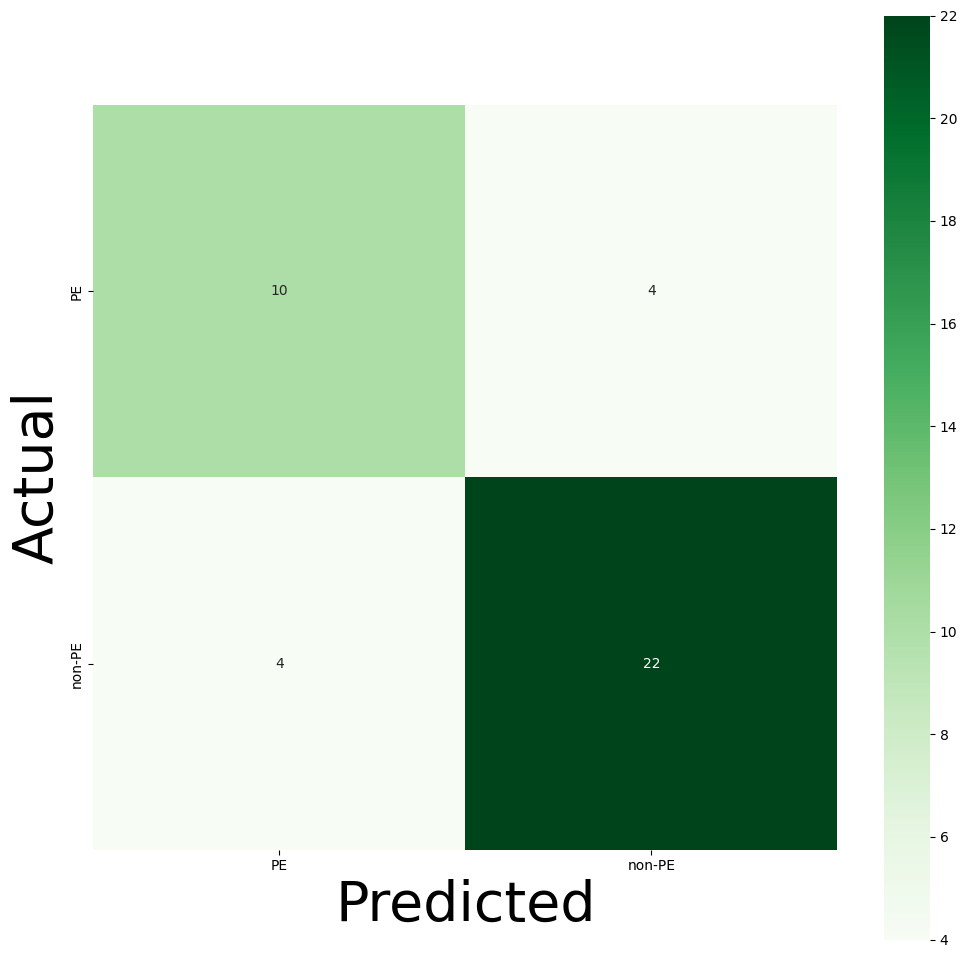

In [11]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
#Y_pred = model.predict(x_val)
disease_types=['PE', 'non-PE']



#Y_pred = np.argmax(Y_pred, axis=1)
#Y_true = y_val
#Y_true = np.argmax(y_val,axis=1)
#print (Y_pred)
#print (Y_true)
#cm = confusion_matrix(Y_true, Y_pred)

cm = [[TP,FN],[FP,TN]]

plt.figure(figsize=(12, 12))
ax = sns.heatmap(cm, cmap=plt.cm.Greens, annot=True, square=True, xticklabels=disease_types, yticklabels=disease_types)
ax.set_ylabel('Actual', fontsize=40)
ax.set_xlabel('Predicted', fontsize=40)

[0.         0.         0.         0.03846154 0.03846154 0.07692308
 0.07692308 0.11538462 0.11538462 0.15384615 0.15384615 0.69230769
 0.69230769 0.84615385 0.84615385 0.88461538 0.88461538 1.        ] [0.         0.07142857 0.14285714 0.14285714 0.28571429 0.28571429
 0.35714286 0.35714286 0.64285714 0.64285714 0.71428571 0.71428571
 0.78571429 0.78571429 0.85714286 0.85714286 1.         1.        ] [70.72272992 69.72272992 66.41545296 59.54758525 57.5156033  57.50823021
 55.11735678 51.91261768 46.45735621 45.07212639 44.1744417  26.49771571
 25.36552548 17.0017913  15.81058949 12.23317087 11.47727743  1.09489504]


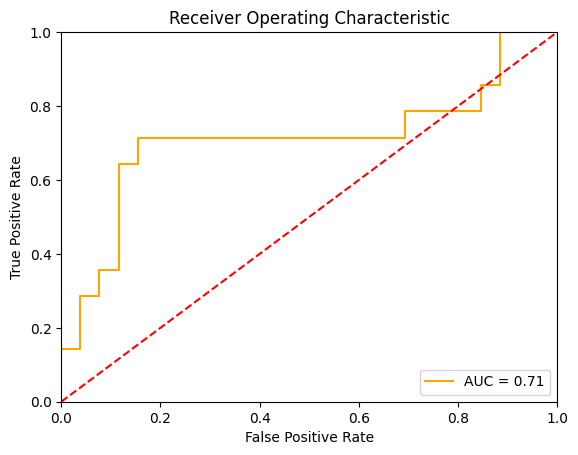

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score, auc

# 讀取資料
import pandas as pd
#df=pd.read_csv('./AUC.csv')

# 在各種『決策門檻』（decision threshold）下，計算 『真陽率』（True Positive Rate；TPR）與『假陽率』（False Positive Rate；FPR）
fpr, tpr, threshold = roc_curve(df_out2['actual'], df_out2['predict'])
print(fpr, tpr, threshold)

auc1 = auc(fpr, tpr)
## Plot the result
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, color = 'orange', label = 'AUC = %0.2f' % auc1)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()  

#### 

In [4]:
import os
import zipfile
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers 
from keras.layers import Conv3D, MaxPool3D, Flatten, Dense

# Folder "nr_128_64" consist of CT scans having normal lung tissue or other lung disease

model_name = "PE_classification_224_160_48_1_3_d_good1.h5"

normal_scan_paths2 = [
    os.path.join(os.getcwd(), "C:/Users/85298/AI/PE0415/test/nr", x)
    for x in os.listdir("C:/Users/85298/AI/PE0415/test/nr")
]
# Folder "pe_128_64" consist of CT scans having Pulmonary embolism,

abnormal_scan_paths2 = [
    os.path.join(os.getcwd(),"C:/Users/85298/AI/PE0415/test/pe", x)
    for x in os.listdir("C:/Users/85298/AI/PE0415/test/pe")
]

print("CT scans with normal lung tissue: " + str(len(normal_scan_paths2)))
print("CT scans with abnormal lung tissue: " + str(len(abnormal_scan_paths2)))


####################################################

import nibabel as nib

from scipy import ndimage


def read_nifti_file(filepath):
#   Read and load volume
    # Read file
    scan = nib.load(filepath)
    # Get raw data
    scan = scan.get_fdata()
    return scan


abnormal_scans2 = np.array([read_nifti_file(path) for path in abnormal_scan_paths2])
normal_scans2 = np.array([read_nifti_file(path) for path in normal_scan_paths2])

nr100 = round(len(normal_scan_paths2)  )
pe100 = round(len(abnormal_scan_paths2)   )


#print("nr70%:",nr70,"nr30%",nr30)
#print("pe70%:",pe70,"pe30%:",pe30)

# For the CT scans having Pulmonary embolism
# assign 1, for the normal and other disease ones assign 0.
abnormal_labels2 = np.array([1 for _ in range(len(abnormal_scans2))])
normal_labels2 = np.array([0 for _ in range(len(normal_scans2))])

# Split data in the ratio 70-30 for training and validation.
x_train2 = np.concatenate((abnormal_scans2[:pe100], normal_scans2[:nr100]), axis=0)
y_train2 = np.concatenate((abnormal_labels2[:pe100], normal_labels2[:nr100]), axis=0)
x_val2 = np.concatenate((abnormal_scans2[pe100:], normal_scans2[nr100:]), axis=0)
y_val2 = np.concatenate((abnormal_labels2[pe100:], normal_labels2[nr100:]), axis=0)
print(
    "Number of samples in train and validation are %d and %d."
    % (x_train2.shape[0], x_val2.shape[0])
)


####################################################


CT scans with normal lung tissue: 1
CT scans with abnormal lung tissue: 2
Number of samples in train and validation are 3 and 0.


In [5]:
import numpy as np
import pandas as pd
import csv


abnormal_correct = 0
abnormal_wrong = 0
other_correct = 0
other_wrong = 0

df_out = pd.DataFrame(columns = ["predict", "actual"])

for patient in range (0,len(y_train2)):
    

# Load best weights.

#    model.load_weights("C:/Users/85298/AI/PE0210/backup_model/PE_classification_128_128_b.h5")
    model.load_weights(model_name)
    prediction = model.predict(np.expand_dims(x_train2[patient], axis=0))[0]
    label_1 = y_train2[patient]
    
    scores = [1 - prediction[0], prediction[0]]
    print(label_1)
    if (prediction[0] > 0.01) & (label_1 == 1) :
        abnormal_correct = abnormal_correct + 1
    if (prediction[0] > 0.01) & (label_1 == 0) :
        abnormal_wrong = abnormal_wrong + 1
    if (prediction[0] < 0.01) & (label_1 == 0) :
        other_correct = other_correct + 1
    if (prediction[0] < 0.01) & (label_1 == 1) :
        other_wrong = other_wrong + 1        
        
    prediction_score = prediction[0] *100        
        
    df_out = df_out.append({'predict' : prediction_score , 'actual' : label_1 },
        ignore_index = True)                   
    
        
    print (abnormal_correct,other_wrong,other_correct,abnormal_wrong )    
        

    class_names = ["normal", "abnormal"]
    for score, name in zip(scores, class_names):
        print(
            "This model is %.2f percent confident that CT scan is %s"
            % ((100 * score), name)
        )
        
print (df_out)

1/1 [==============================] - 1s 1s/step
1
1 0 0 0
This model is 72.68 percent confident that CT scan is normal
This model is 27.32 percent confident that CT scan is abnormal


C:\Users\85298\AppData\Local\Temp\ipykernel_55504\4101021649.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_out = df_out.append({'predict' : prediction_score , 'actual' : label_1 },


1/1 [==============================] - 0s 15ms/step
1
2 0 0 0
This model is 48.98 percent confident that CT scan is normal
This model is 51.02 percent confident that CT scan is abnormal


C:\Users\85298\AppData\Local\Temp\ipykernel_55504\4101021649.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_out = df_out.append({'predict' : prediction_score , 'actual' : label_1 },


1/1 [==============================] - 0s 15ms/step
0
2 0 0 1
This model is 65.91 percent confident that CT scan is normal
This model is 34.09 percent confident that CT scan is abnormal
     predict  actual
0  27.321896     1.0
1  51.021302     1.0
2  34.092897     0.0


C:\Users\85298\AppData\Local\Temp\ipykernel_55504\4101021649.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_out = df_out.append({'predict' : prediction_score , 'actual' : label_1 },
